# Exploratory Data Analysis - Zillow Dataset

Reference:<br/>
https://www.kaggle.com/philippsp/exploratory-analysis-zillowm<br/>
https://www.kaggle.com/headsortails/pytanic<br/>

In [76]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
from io import StringIO
import sklearn as sk
import itertools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from io import StringIO
from statsmodels.graphics.mosaicplot import mosaic

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn import svm
import xgboost as xgb
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

sns.set(style='white', context='notebook', palette='deep')
pd.options.display.max_columns = 999

# Load Input Data

In [77]:
properties = pd.read_csv('properties_2017.csv')
transactions = pd.read_csv('train_2017.csv')
sample_submission = pd.read_csv('sample_submission.csv')

C:\Users\renat\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [78]:
properties.head(10)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,1959.0,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN
5,10898347,NaN,NaN,NaN,0.0,0.0,4.0,4.0,NaN,NaN,NaN,2400.0,NaN,NaN,2400.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34171873.0,-118380906.0,2500.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAC4,6.037125e+07,12447.0,3101.0,46795.0,96446.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1943.0,1.0,NaN,179072.0,287634.0,2016.0,108562.0,3661.28,NaN,NaN,NaN
6,10933547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34131929.0,-118351474.0,NaN,NaN,NaN,NaN,NaN,NaN,010V,260.0,LAC2,6.037144e+07,12447.0,3101.0,274049.0,96049.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404013.0,563029.0,2016.0,159016.0,6773.34,NaN,NaN,NaN
7,10940747,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,3611.0,NaN,NaN,3611.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34171345.0,-118314900.0,5333.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,BUC4YY,6.037311e+07,396054.0,3101.0,NaN,96434.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1946.0,1.0,NaN,103553.0,698984.0,2016.0,595431.0,7857.84,NaN,NaN,NaN
8,10954547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34218210.0,-118331311.0,145865.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,BUR1*,6.037310e+07,396054.0,3101.0,NaN,96436.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
9,10976347,NaN,NaN,NaN,0.0,0.0,3.0,4.0,NaN,NaN,NaN,3754.0,NaN,NaN,3754.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34289776.0,-118432085.0,7494.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,SFC2*,6.037320e+07,47547.0,3101.0,NaN,96366.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1978.0,

In [79]:
transactions.head(10)

,parcelid,logerror,transactiondate
0,14297519,0.025595,2017-01-01
1,17052889,0.055619,2017-01-01
2,14186244,0.005383,2017-01-01
3,12177905,-0.103410,2017-01-01
4,10887214,0.006940,2017-01-01
5,17143294,-0.020526,2017-01-01
6,12095076,-0.001011,2017-01-01
7,12069064,0.101723,2017-01-01
8,12790562,-0.040966,2017-01-02
9,11542646,-0.036763,2017-01-02


In [80]:
sample_submission.head(10)

,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0,0,0,0,0,0
1,10759547,0,0,0,0,0,0
2,10843547,0,0,0,0,0,0
3,10859147,0,0,0,0,0,0
4,10879947,0,0,0,0,0,0
5,10898347,0,0,0,0,0,0
6,10933547,0,0,0,0,0,0
7,10940747,0,0,0,0,0,0
8,10954547,0,0,0,0,0,0
9,10976347,0,0,0,0,0,0


In [81]:
#making our data more readable

data_dictionary_string = """key|old_key|description
aircon|airconditioningtypeid|Type of cooling system present in the home (if any)architectural_style
architecturalstyletypeid|architecturalstyletypeid|Architectural style of the home (i.e. ranch, colonial, split-level, etc…)
area_base|finishedsquarefeet6|Base unfinished and finished area
area_firstfloor_finished|finishedfloor1squarefeet|Size of the finished living area on the first (entry) floor of the home
area_garage|garagetotalsqft|Total number of square feet of all garages on lot including an attached garage
area_live_finished|finishedsquarefeet12|Finished living area
area_liveperi_finished|finishedsquarefeet13|Perimeter living area
area_lot|lotsizesquarefeet|Area of the lot in square feet
area_patio|yardbuildingsqft17|Patio in yard
area_pool|poolsizesum|Total square footage of all pools on property
area_shed|yardbuildingsqft26|Storage shed/building in yard
area_total_calc|calculatedfinishedsquarefeet|Calculated total finished living area of the home
area_total_finished|finishedsquarefeet15|Total area
area_unknown|finishedsquarefeet50|Size of the finished living area on the first (entry) floor of the home
basementsqft|basementsqft|Finished living area below or partially below ground level
build_year|yearbuilt|The Year the principal residence was built
deck|decktypeid|Type of deck (if any) present on parcelfinishedfloor1squarefeet
flag_fireplace|fireplaceflag|Is a fireplace present in this home
flag_tub|hashottuborspa|Does the home have a hot tub or spa
framing|buildingclasstypeid|The building framing type (steel frame, wood frame, concrete/brick)
heating|heatingorsystemtypeid|Type of home heating system
id_fips|fips|Federal Information Processing Standard code - see https://en.wikipedia.org/wiki/FIPS_county_code for more details
id_parcel|parcelid|Unique identifier for parcels (lots)
id_zoning_raw|rawcensustractandblock|Census tract and block ID combined - also contains blockgroup assignment by extension
id_zoning|censustractandblock|Census tract and block ID combined - also contains blockgroup assignment by extension
latitude|latitude|Latitude of the middle of the parcel multiplied by 10e6
longitude|longitude|Longitude of the middle of the parcel multiplied by 10e6
material|typeconstructiontypeid|What type of construction material was used to construct the home
num_75_bath|threequarterbathnbr|Number of 3/4 bathrooms in house (shower + sink + toilet)
num_bathroom_calc|calculatedbathnbr|Number of bathrooms in home including fractional bathroom
num_bathroom|bathroomcnt|Number of bathrooms in home including fractional bathrooms
num_bath|fullbathcnt|Number of full bathrooms (sink, shower + bathtub, and toilet) present in home
num_bedroom|bedroomcnt|Number of bedrooms in home
num_fireplace|fireplacecnt|Number of fireplaces in a home (if any)
num_garage|garagecarcnt|Total number of garages on the lot including an attached garage
num_pool|poolcnt|Number of pools on the lot (if any)
num_room|roomcnt|Total number of rooms in the principal residence
num_story|numberofstories|Number of stories or levels the home has
num_unit|unitcnt|Number of units the structure is built into (i.e. 2 = duplex, 3 = triplex, etc...)
pooltypeid10|pooltypeid10|Spa or Hot Tub
pooltypeid2|pooltypeid2|Pool with Spa/Hot Tub
pooltypeid7|pooltypeid7|Pool without hot tub
quality|buildingqualitytypeid|Overall assessment of condition of the building from best (lowest) to worst (highest)
region_city|regionidcity|City in which the property is located (if any)
region_county|regionidcounty|County in which the property is located
region_neighbor|regionidneighborhood|Neighborhood in which the property is located
region_zip|regionidzip|Zip code in which the property is located
story|storytypeid|Type of floors in a multi-story house (i.e. basement and main level, split-level, attic, etc.). See tab for details.
tax_building|structuretaxvaluedollarcnt|The assessed value of the built structure on the parcel
tax_delinquency_year|taxdelinquencyyear|Year for which the unpaid propert taxes were due
tax_delinquency|taxdelinquencyflag|Property taxes for this parcel are past due as of 2015
tax_land|landtaxvaluedollarcnt|The assessed value of the land area of the parcel
tax_property|taxamount|The total property tax assessed for that assessment year
tax_total|taxvaluedollarcnt|The total tax assessed value of the parcel
tax_year|assessmentyear|The year of the property tax assessmentbasementsqft
zoning_landuse_county|propertycountylandusecode|County land use code i.e. it's zoning at the county level
zoning_landuse|propertylandusetypeid|Type of land use the property is zoned for
zoning_property|propertyzoningdesc|Description of the allowed land uses (zoning) for that property
"""

data_dictionary_df = pd.read_csv(StringIO(data_dictionary_string), sep="|")
data_dictionary_df.head(10)


,key,old_key,description
0,aircon,airconditioningtypeid,Type of cooling system present in the home (if...
1,architecturalstyletypeid,architecturalstyletypeid,"Architectural style of the home (i.e. ranch, c..."
2,area_base,finishedsquarefeet6,Base unfinished and finished area
3,area_firstfloor_finished,finishedfloor1squarefeet,Size of the finished living area on the first ...
4,area_garage,garagetotalsqft,Total number of square feet of all garages on ...
5,area_live_finished,finishedsquarefeet12,Finished living area
6,area_liveperi_finished,finishedsquarefeet13,Perimeter living area
7,area_lot,lotsizesquarefeet,Area of the lot in square feet
8,area_patio,yardbuildingsqft17,Patio in yard
9,area_pool,poolsizesum,Total square footage of all pools on property


In [82]:
data_dictionary_df.sort_values(by="key", inplace=True)

In [83]:
data_dictionary_df

,key,old_key,description
0,aircon,airconditioningtypeid,Type of cooling system present in the home (if...
1,architecturalstyletypeid,architecturalstyletypeid,"Architectural style of the home (i.e. ranch, c..."
2,area_base,finishedsquarefeet6,Base unfinished and finished area
3,area_firstfloor_finished,finishedfloor1squarefeet,Size of the finished living area on the first ...
4,area_garage,garagetotalsqft,Total number of square feet of all garages on ...
5,area_live_finished,finishedsquarefeet12,Finished living area
6,area_liveperi_finished,finishedsquarefeet13,Perimeter living area
7,area_lot,lotsizesquarefeet,Area of the lot in square feet
8,area_patio,yardbuildingsqft17,Patio in yard
9,area_pool,poolsizesum,Total square footage of all pools on property


In [84]:
data_dictionary = data_dictionary_df['description']
data_dictionary.index = data_dictionary_df['key']
data_dictionary["id_parcel"]

'Unique identifier for parcels (lots)'

In [85]:
data_dictionary

key
aircon                      Type of cooling system present in the home (if...
architecturalstyletypeid    Architectural style of the home (i.e. ranch, c...
area_base                                   Base unfinished and finished area
area_firstfloor_finished    Size of the finished living area on the first ...
area_garage                 Total number of square feet of all garages on ...
area_live_finished                                       Finished living area
area_liveperi_finished                                  Perimeter living area
area_lot                                       Area of the lot in square feet
area_patio                                                      Patio in yard
area_pool                       Total square footage of all pools on property
area_shed                                       Storage shed/building in yard
area_total_calc             Calculated total finished living area of the home
area_total_finished                                         

In [86]:
data_dictionary.describe()

count                                                    58
unique                                                   56
top       Census tract and block ID combined - also cont...
freq                                                      2
Name: description, dtype: object

In [87]:
# Remap properties with new keys from data_dictionary
data_dictionary_rename = data_dictionary_df["key"]
data_dictionary_rename.index = data_dictionary_df["old_key"]
data_dictionary_rename.to_dict()

{'airconditioningtypeid': 'aircon',
 'architecturalstyletypeid': 'architecturalstyletypeid',
 'finishedsquarefeet6': 'area_base',
 'finishedfloor1squarefeet': 'area_firstfloor_finished',
 'garagetotalsqft': 'area_garage',
 'finishedsquarefeet12': 'area_live_finished',
 'finishedsquarefeet13': 'area_liveperi_finished',
 'lotsizesquarefeet': 'area_lot',
 'yardbuildingsqft17': 'area_patio',
 'poolsizesum': 'area_pool',
 'yardbuildingsqft26': 'area_shed',
 'calculatedfinishedsquarefeet': 'area_total_calc',
 'finishedsquarefeet15': 'area_total_finished',
 'finishedsquarefeet50': 'area_unknown',
 'basementsqft': 'basementsqft',
 'yearbuilt': 'build_year',
 'decktypeid': 'deck',
 'fireplaceflag': 'flag_fireplace',
 'hashottuborspa': 'flag_tub',
 'buildingclasstypeid': 'framing',
 'heatingorsystemtypeid': 'heating',
 'fips': 'id_fips',
 'parcelid': 'id_parcel',
 'censustractandblock': 'id_zoning',
 'rawcensustractandblock': 'id_zoning_raw',
 'latitude': 'latitude',
 'longitude': 'longitude',
 

In [88]:
properties.head(5)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,1959.0,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN


In [89]:
data_dictionary_rename.head(5)

old_key
airconditioningtypeid                         aircon
architecturalstyletypeid    architecturalstyletypeid
finishedsquarefeet6                        area_base
finishedfloor1squarefeet    area_firstfloor_finished
garagetotalsqft                          area_garage
Name: key, dtype: object

In [90]:
# Apply rename to properties
properties.rename(columns=data_dictionary_rename, inplace=True)
properties.set_index('id_parcel', drop=False, inplace=True)


In [91]:
properties.head()

,id_parcel,aircon,architecturalstyletypeid,basementsqft,num_bathroom,num_bedroom,framing,quality,num_bathroom_calc,deck,area_firstfloor_finished,area_total_calc,area_live_finished,area_liveperi_finished,area_total_finished,area_unknown,area_base,id_fips,num_fireplace,num_bath,num_garage,area_garage,flag_tub,heating,latitude,longitude,area_lot,num_pool,area_pool,pooltypeid10,pooltypeid2,pooltypeid7,zoning_landuse_county,zoning_landuse,zoning_property,id_zoning_raw,region_city,region_county,region_neighbor,region_zip,num_room,story,num_75_bath,material,num_unit,area_patio,area_shed,build_year,num_story,flag_fireplace,tax_building,tax_total,tax_year,tax_land,tax_property,tax_delinquency,tax_delinquency_year,id_zoning
id_parcel,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10754147,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
10759547,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
10843547,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,1959.0,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
10859147,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
10879947,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN


In [92]:
properties.index.name = 'id'
properties.head()

,id_parcel,aircon,architecturalstyletypeid,basementsqft,num_bathroom,num_bedroom,framing,quality,num_bathroom_calc,deck,area_firstfloor_finished,area_total_calc,area_live_finished,area_liveperi_finished,area_total_finished,area_unknown,area_base,id_fips,num_fireplace,num_bath,num_garage,area_garage,flag_tub,heating,latitude,longitude,area_lot,num_pool,area_pool,pooltypeid10,pooltypeid2,pooltypeid7,zoning_landuse_county,zoning_landuse,zoning_property,id_zoning_raw,region_city,region_county,region_neighbor,region_zip,num_room,story,num_75_bath,material,num_unit,area_patio,area_shed,build_year,num_story,flag_fireplace,tax_building,tax_total,tax_year,tax_land,tax_property,tax_delinquency,tax_delinquency_year,id_zoning
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10754147,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
10759547,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
10843547,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,1959.0,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
10859147,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
10879947,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN


In [93]:
properties.index.name

'id'

In [94]:
transactions.head()

,parcelid,logerror,transactiondate
0,14297519,0.025595,2017-01-01
1,17052889,0.055619,2017-01-01
2,14186244,0.005383,2017-01-01
3,12177905,-0.103410,2017-01-01
4,10887214,0.006940,2017-01-01


In [95]:
transactions = transactions.rename(columns={
    "parcelid": "id_parcel",
    "transactiondate": "date"
})
transactions.sort_values(by="id_parcel", inplace=True)
transactions.set_index('id_parcel', drop=False, inplace=True)
transactions.index.name='id'
transactions.head()

,id_parcel,logerror,date
id,,,
10711855,10711855,-0.007357,2017-07-07
10711877,10711877,0.021066,2017-08-29
10711888,10711888,0.077174,2017-04-04
10711910,10711910,-0.041238,2017-03-17
10711923,10711923,-0.009496,2017-03-24


In [96]:
properties = properties.join(transactions, on="id_parcel", rsuffix="_transaction", how="inner", sort=True)
properties.head()

,id_parcel,aircon,architecturalstyletypeid,basementsqft,num_bathroom,num_bedroom,framing,quality,num_bathroom_calc,deck,area_firstfloor_finished,area_total_calc,area_live_finished,area_liveperi_finished,area_total_finished,area_unknown,area_base,id_fips,num_fireplace,num_bath,num_garage,area_garage,flag_tub,heating,latitude,longitude,area_lot,num_pool,area_pool,pooltypeid10,pooltypeid2,pooltypeid7,zoning_landuse_county,zoning_landuse,zoning_property,id_zoning_raw,region_city,region_county,region_neighbor,region_zip,num_room,story,num_75_bath,material,num_unit,area_patio,area_shed,build_year,num_story,flag_fireplace,tax_building,tax_total,tax_year,tax_land,tax_property,tax_delinquency,tax_delinquency_year,id_zoning,id_parcel_transaction,logerror,date
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10711855,10711855,NaN,NaN,NaN,2.0,3.0,NaN,8.0,2.0,NaN,NaN,2107.0,2107.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34222559.0,-118617387.0,9158.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LARE9,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1972.0,NaN,NaN,249655.0,624139.0,2016.0,374484.0,7659.36,NaN,NaN,6.037113e+13,10711855,-0.007357,2017-07-07
10711877,10711877,1.0,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,NaN,1882.0,1882.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34220261.0,-118616409.0,9035.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LARE9,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1972.0,NaN,NaN,253000.0,660000.0,2016.0,407000.0,8123.91,NaN,NaN,6.037113e+13,10711877,0.021066,2017-08-29
10711888,10711888,1.0,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,NaN,1882.0,1882.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34222491.0,-118616854.0,9800.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LARE9,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1972.0,NaN,NaN,257591.0,542923.0,2016.0,285332.0,6673.24,NaN,NaN,6.037113e+13,10711888,0.077174,2017-04-04
10711910,10711910,NaN,NaN,NaN,2.0,3.0,NaN,8.0,2.0,NaN,NaN,1477.0,1477.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34221864.0,-118615739.0,11285.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LARE11,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1960.0,NaN,NaN,57968.0,78031.0,2016.0,20063.0,1116.46,NaN,NaN,6.037113e+13,10711910,-0.041238,2017-03-17
10711923,10711923,NaN,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,NaN,1918.0,1918.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34220619.0,-118615253.0,11239.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LARE11,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1960.0,NaN,NaN,167869.0,415459.0,2016.0,247590.0,5239.85,NaN,NaN,6.037113e+13,10711923,-0.009496,2017-03-24


# Duplicate Properties
Properties that have been sold more than once will have multiple transaction entries.

In [97]:
transaction_counts = pd.DataFrame({'count': transactions.groupby("id_parcel").size()}).reset_index()

In [98]:
transaction_counts

,id_parcel,count
0,10711855,1
1,10711877,1
2,10711888,1
3,10711910,1
4,10711923,1
...,...,...
77409,167686999,1
77410,167687739,1
77411,167687839,1
77412,167688532,1


In [99]:
transaction_duplicate_counts = {
    1: { 
        "total":   transaction_counts[transaction_counts['count'].eq(1)].size, 
        "percent": transaction_counts[transaction_counts['count'].eq(1)].size / transaction_counts.size * 100
    },    
    2: { 
        "total":   transaction_counts[transaction_counts['count'].eq(2)].size, 
        "percent": transaction_counts[transaction_counts['count'].eq(2)].size / transaction_counts.size * 100
    }, 
    3: { 
        "total":   transaction_counts[transaction_counts['count'].eq(3)].size, 
        "percent": transaction_counts[transaction_counts['count'].eq(3)].size / transaction_counts.size * 100
    }, 
    4: { 
        "total":   transaction_counts[transaction_counts['count'].gt(3)].size, 
        "percent": transaction_counts[transaction_counts['count'].gt(3)].size / transaction_counts.size * 100
    }    
}
trasaction_duplicate_counts

{1: {'total': 154436, 'percent': 99.74681582142765},
 2: {'total': 386, 'percent': 0.24930891053297852},
 3: {'total': 6, 'percent': 0.0038752680393727233},
 4: {'total': 0, 'percent': 0.0}}

In [100]:
properties_with_transactions = properties[properties['id_parcel_transaction'].notnull()];
properties_with_transactions

,id_parcel,aircon,architecturalstyletypeid,basementsqft,num_bathroom,num_bedroom,framing,quality,num_bathroom_calc,deck,area_firstfloor_finished,area_total_calc,area_live_finished,area_liveperi_finished,area_total_finished,area_unknown,area_base,id_fips,num_fireplace,num_bath,num_garage,area_garage,flag_tub,heating,latitude,longitude,area_lot,num_pool,area_pool,pooltypeid10,pooltypeid2,pooltypeid7,zoning_landuse_county,zoning_landuse,zoning_property,id_zoning_raw,region_city,region_county,region_neighbor,region_zip,num_room,story,num_75_bath,material,num_unit,area_patio,area_shed,build_year,num_story,flag_fireplace,tax_building,tax_total,tax_year,tax_land,tax_property,tax_delinquency,tax_delinquency_year,id_zoning,id_parcel_transaction,logerror,date
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10711855,10711855,NaN,NaN,NaN,2.0,3.0,NaN,8.0,2.0,NaN,NaN,2107.0,2107.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34222559.0,-118617387.0,9158.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LARE9,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1972.0,NaN,NaN,249655.0,624139.0,2016.0,374484.0,7659.36,NaN,NaN,6.037113e+13,10711855,-0.007357,2017-07-07
10711877,10711877,1.0,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,NaN,1882.0,1882.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34220261.0,-118616409.0,9035.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LARE9,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1972.0,NaN,NaN,253000.0,660000.0,2016.0,407000.0,8123.91,NaN,NaN,6.037113e+13,10711877,0.021066,2017-08-29
10711888,10711888,1.0,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,NaN,1882.0,1882.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34222491.0,-118616854.0,9800.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LARE9,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1972.0,NaN,NaN,257591.0,542923.0,2016.0,285332.0,6673.24,NaN,NaN,6.037113e+13,10711888,0.077174,2017-04-04
10711910,10711910,NaN,NaN,NaN,2.0,3.0,NaN,8.0,2.0,NaN,NaN,1477.0,1477.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34221864.0,-118615739.0,11285.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LARE11,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1960.0,NaN,NaN,57968.0,78031.0,2016.0,20063.0,1116.46,NaN,NaN,6.037113e+13,10711910,-0.041238,2017-03-17
10711923,10711923,NaN,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,NaN,1918.0,1918.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34220619.0,-118615253.0,11239.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LARE11,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1960.0,NaN,NaN,167869.0,415459.0,2016.0,247590.0,5239.85,NaN,NaN,6.037113e+13,10711923,-0.009496,2017-03-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167686999,167686999,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34424104.0,-118468083.0,NaN,NaN,NaN,NaN,NaN,NaN,0100,261.0,SCRM,6.037920e+07,NaN,3101.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26405.0,2016.0,26405.0,988.48,NaN,NaN,NaN,167686999,-0.068632,2017-02-28
167687739,167687739,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34041716.0,-118455310.0,NaN,NaN,NaN,NaN,NaN,NaN,010C,266.0,LAR3,6.037268e+07,NaN,3101.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5451600.0,6440197.0,2016.0,988597.0,77045.13,NaN,NaN,NaN,167687739,0.360020,2017-03-03
167687839,167687839,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34048223.0,-118520239.0,NaN,NaN,NaN,NaN,NaN,NaN,0100,261.0,LAR1,6.037263e+07,NaN,3101.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1842678.0,2016.0,1842678.0,22045.81,NaN,NaN,NaN,167687839,0.038797,2017-05-31


In [101]:
properties_without_transactions = properties[properties['id_parcel_transaction'].isnull()];
properties_without_transactions

,id_parcel,aircon,architecturalstyletypeid,basementsqft,num_bathroom,num_bedroom,framing,quality,num_bathroom_calc,deck,area_firstfloor_finished,area_total_calc,area_live_finished,area_liveperi_finished,area_total_finished,area_unknown,area_base,id_fips,num_fireplace,num_bath,num_garage,area_garage,flag_tub,heating,latitude,longitude,area_lot,num_pool,area_pool,pooltypeid10,pooltypeid2,pooltypeid7,zoning_landuse_county,zoning_landuse,zoning_property,id_zoning_raw,region_city,region_county,region_neighbor,region_zip,num_room,story,num_75_bath,material,num_unit,area_patio,area_shed,build_year,num_story,flag_fireplace,tax_building,tax_total,tax_year,tax_land,tax_property,tax_delinquency,tax_delinquency_year,id_zoning,id_parcel_transaction,logerror,date
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [105]:
{
    "transactions": { "total": transactions.size, "percent": transactions.size / properties.size * 100},
    "properties": { "total": properties.size, "percent": properties.size / properties.size * 100},
    "properties_with_transactions": { "total": properties_with_transactions.size, "percent": properties_with_transactions.size / properties.size * 100},
    "properties_without_transactions": { "total": properties_without_transactions.size, "percent": properties_without_transactions.size / properties.size * 100},
}

{'transactions': {'total': 232839, 'percent': 4.918032786885246},
 'properties': {'total': 4734393, 'percent': 100.0},
 'properties_with_transactions': {'total': 4734393, 'percent': 100.0},
 'properties_without_transactions': {'total': 0, 'percent': 0.0}}

In [106]:
properties.head()

,id_parcel,aircon,architecturalstyletypeid,basementsqft,num_bathroom,num_bedroom,framing,quality,num_bathroom_calc,deck,area_firstfloor_finished,area_total_calc,area_live_finished,area_liveperi_finished,area_total_finished,area_unknown,area_base,id_fips,num_fireplace,num_bath,num_garage,area_garage,flag_tub,heating,latitude,longitude,area_lot,num_pool,area_pool,pooltypeid10,pooltypeid2,pooltypeid7,zoning_landuse_county,zoning_landuse,zoning_property,id_zoning_raw,region_city,region_county,region_neighbor,region_zip,num_room,story,num_75_bath,material,num_unit,area_patio,area_shed,build_year,num_story,flag_fireplace,tax_building,tax_total,tax_year,tax_land,tax_property,tax_delinquency,tax_delinquency_year,id_zoning,id_parcel_transaction,logerror,date
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10711855,10711855,NaN,NaN,NaN,2.0,3.0,NaN,8.0,2.0,NaN,NaN,2107.0,2107.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34222559.0,-118617387.0,9158.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LARE9,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1972.0,NaN,NaN,249655.0,624139.0,2016.0,374484.0,7659.36,NaN,NaN,6.037113e+13,10711855,-0.007357,2017-07-07
10711877,10711877,1.0,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,NaN,1882.0,1882.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34220261.0,-118616409.0,9035.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LARE9,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1972.0,NaN,NaN,253000.0,660000.0,2016.0,407000.0,8123.91,NaN,NaN,6.037113e+13,10711877,0.021066,2017-08-29
10711888,10711888,1.0,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,NaN,1882.0,1882.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34222491.0,-118616854.0,9800.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LARE9,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1972.0,NaN,NaN,257591.0,542923.0,2016.0,285332.0,6673.24,NaN,NaN,6.037113e+13,10711888,0.077174,2017-04-04
10711910,10711910,NaN,NaN,NaN,2.0,3.0,NaN,8.0,2.0,NaN,NaN,1477.0,1477.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34221864.0,-118615739.0,11285.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LARE11,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1960.0,NaN,NaN,57968.0,78031.0,2016.0,20063.0,1116.46,NaN,NaN,6.037113e+13,10711910,-0.041238,2017-03-17
10711923,10711923,NaN,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,NaN,1918.0,1918.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34220619.0,-118615253.0,11239.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LARE11,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1960.0,NaN,NaN,167869.0,415459.0,2016.0,247590.0,5239.85,NaN,NaN,6.037113e+13,10711923,-0.009496,2017-03-24


#### By calculating the mean of each column, we find the attributes with the most cross-correlation.

In [123]:
properties.drop(['id_parcel'], axis=1).corr().mean(axis=0).sort_values(ascending=False)

area_firstfloor_finished    0.323012
area_total_calc             0.314626
area_unknown                0.313278
area_live_finished          0.301807
num_bathroom_calc           0.300338
num_bath                    0.288213
basementsqft                0.260694
num_bathroom                0.257725
tax_building                0.248672
num_fireplace               0.241208
area_total_finished         0.233352
tax_total                   0.226462
tax_property                0.220377
num_garage                  0.207515
area_patio                  0.198244
area_liveperi_finished      0.197058
area_garage                 0.193979
tax_land                    0.189537
num_bedroom                 0.185556
area_base                   0.175479
area_pool                   0.164865
quality                     0.155743
num_room                    0.143450
build_year                  0.138160
aircon                      0.128757
id_fips                     0.127401
id_zoning_raw               0.120794
n

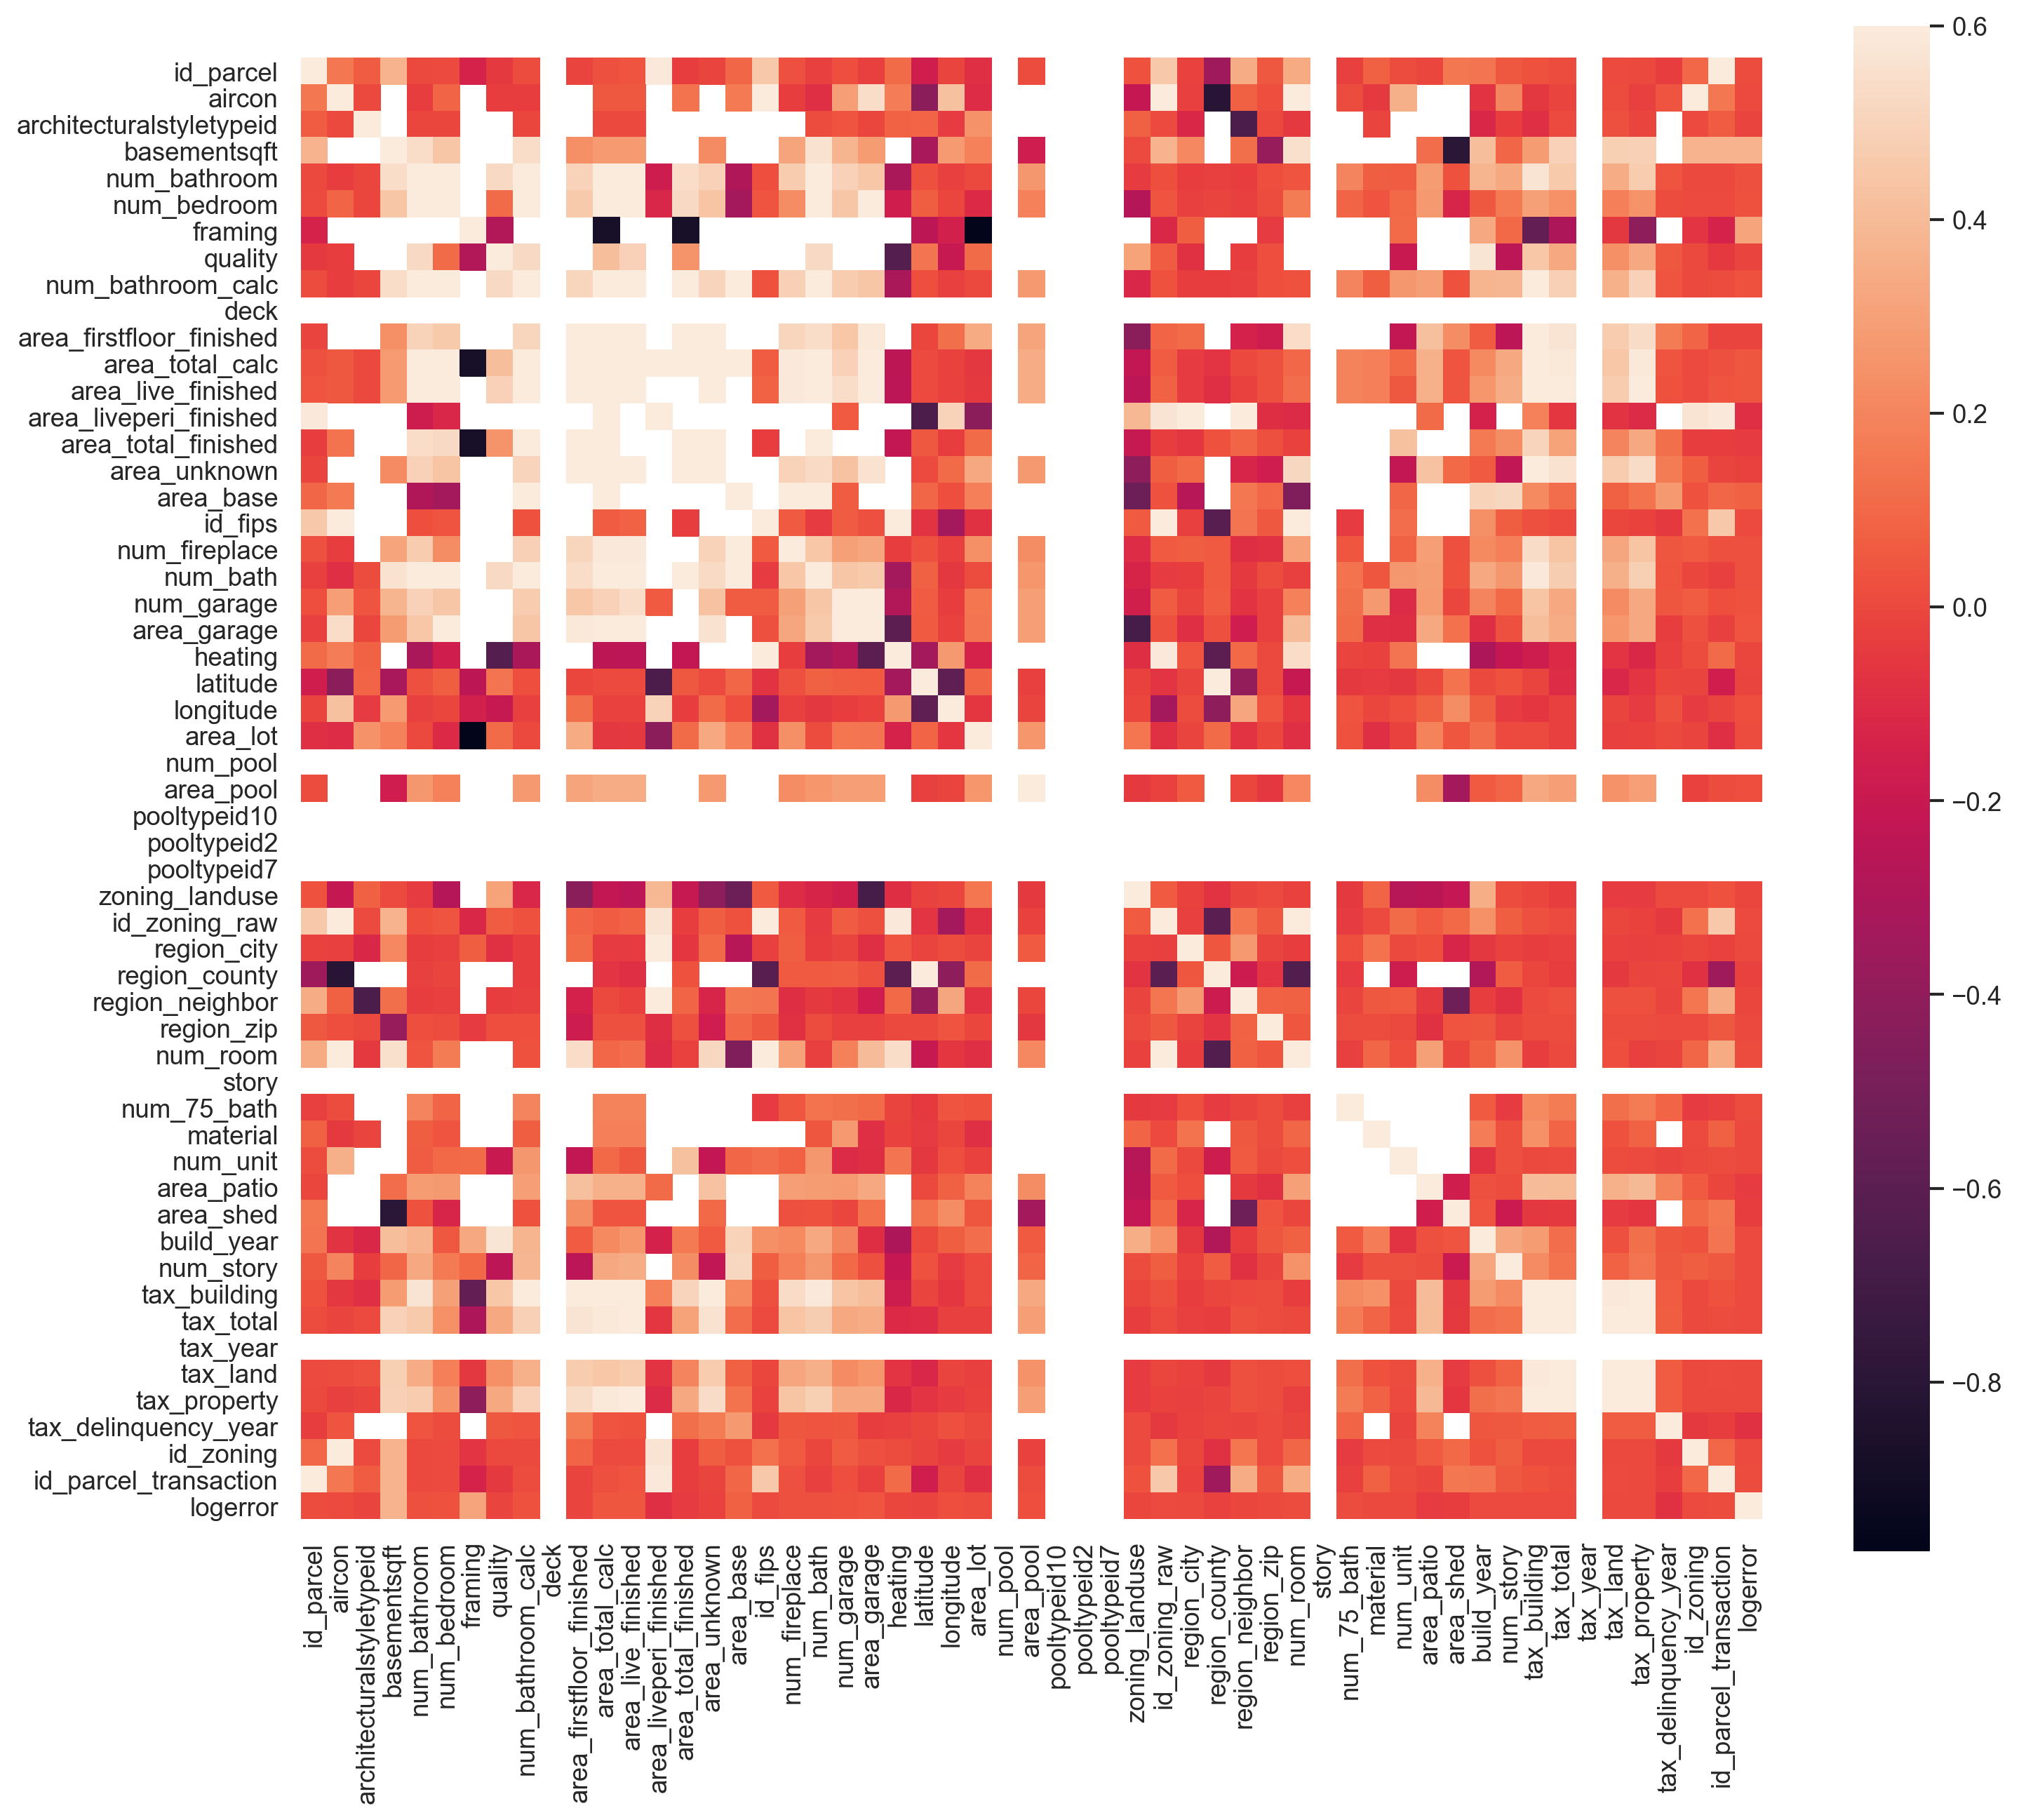

In [124]:
plt.figure(figsize=(14,12))
sns.heatmap(properties.corr(), vmax=0.6, square=True, annot=False)

In [133]:
cross_correllation_matrix= properties.corr().mean().sort_values(ascending=False)
cross_correllation_matrix

area_firstfloor_finished    0.314024
area_total_calc             0.308619
area_unknown                0.304552
area_live_finished          0.295770
num_bathroom_calc           0.294143
num_bath                    0.281394
basementsqft                0.263859
num_bathroom                0.252311
tax_building                0.244141
num_fireplace               0.236050
area_total_finished         0.225696
tax_total                   0.222005
tax_property                0.215832
area_liveperi_finished      0.213563
num_garage                  0.203354
area_patio                  0.192531
area_garage                 0.188715
tax_land                    0.185671
num_bedroom                 0.181753
area_base                   0.172613
area_pool                   0.160353
quality                     0.149201
num_room                    0.147656
build_year                  0.138221
id_fips                     0.136596
aircon                      0.129341
id_zoning_raw               0.127820
i

In [140]:
attributes_id = cross_correllation_matrix[['id_parcel', 'id_zoning', 'id_zoning_raw', 'id_parcel_transaction']].keys()

In [141]:
attributes_id

Index(['id_parcel', 'id_zoning', 'id_zoning_raw', 'id_parcel_transaction'], dtype='object')

In [158]:
attributes_utility = cross_correllation_matrix[cross_correllation_matrix.gt(0.22)].keys()

In [159]:
attributes_utility

Index(['area_firstfloor_finished', 'area_total_calc', 'area_unknown',
       'area_live_finished', 'num_bathroom_calc', 'num_bath', 'basementsqft',
       'num_bathroom', 'tax_building', 'num_fireplace', 'area_total_finished',
       'tax_total'],
      dtype='object')

In [160]:
attributes_price = cross_correllation_matrix[cross_correllation_matrix.lt(0.22) & cross_correllation_matrix.gt(0.15)].keys()

In [161]:
attributes_price

Index(['tax_property', 'area_liveperi_finished', 'num_garage', 'area_patio',
       'area_garage', 'tax_land', 'num_bedroom', 'area_base', 'area_pool'],
      dtype='object')

In [162]:
attributes_random = cross_correllation_matrix[cross_correllation_matrix.lt(0.15)].drop(attributes_id).keys()

In [163]:
attributes_random

Index(['quality', 'num_room', 'build_year', 'id_fips', 'aircon', 'num_story',
       'material', 'num_75_bath', 'tax_delinquency_year', 'num_unit',
       'logerror', 'region_neighbor', 'area_lot', 'region_city',
       'architecturalstyletypeid', 'longitude', 'region_zip', 'area_shed',
       'latitude', 'heating', 'zoning_landuse', 'region_county', 'framing'],
      dtype='object')

In [164]:
attributes_null = cross_correllation_matrix[cross_correllation_matrix.isnull()].keys()

In [165]:
attributes_null

Index(['deck', 'num_pool', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'story', 'tax_year'],
      dtype='object')

In [166]:
properties = properties.drop(attributes_null, errors='ignore')

In [167]:
properties

,id_parcel,aircon,architecturalstyletypeid,basementsqft,num_bathroom,num_bedroom,framing,quality,num_bathroom_calc,deck,area_firstfloor_finished,area_total_calc,area_live_finished,area_liveperi_finished,area_total_finished,area_unknown,area_base,id_fips,num_fireplace,num_bath,num_garage,area_garage,flag_tub,heating,latitude,longitude,area_lot,num_pool,area_pool,pooltypeid10,pooltypeid2,pooltypeid7,zoning_landuse_county,zoning_landuse,zoning_property,id_zoning_raw,region_city,region_county,region_neighbor,region_zip,num_room,story,num_75_bath,material,num_unit,area_patio,area_shed,build_year,num_story,flag_fireplace,tax_building,tax_total,tax_year,tax_land,tax_property,tax_delinquency,tax_delinquency_year,id_zoning,id_parcel_transaction,logerror,date
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10711855,10711855,NaN,NaN,NaN,2.0,3.0,NaN,8.0,2.0,NaN,NaN,2107.0,2107.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34222559.0,-118617387.0,9158.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LARE9,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1972.0,NaN,NaN,249655.0,624139.0,2016.0,374484.0,7659.36,NaN,NaN,6.037113e+13,10711855,-0.007357,2017-07-07
10711877,10711877,1.0,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,NaN,1882.0,1882.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34220261.0,-118616409.0,9035.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LARE9,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1972.0,NaN,NaN,253000.0,660000.0,2016.0,407000.0,8123.91,NaN,NaN,6.037113e+13,10711877,0.021066,2017-08-29
10711888,10711888,1.0,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,NaN,1882.0,1882.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34222491.0,-118616854.0,9800.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LARE9,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1972.0,NaN,NaN,257591.0,542923.0,2016.0,285332.0,6673.24,NaN,NaN,6.037113e+13,10711888,0.077174,2017-04-04
10711910,10711910,NaN,NaN,NaN,2.0,3.0,NaN,8.0,2.0,NaN,NaN,1477.0,1477.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34221864.0,-118615739.0,11285.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LARE11,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1960.0,NaN,NaN,57968.0,78031.0,2016.0,20063.0,1116.46,NaN,NaN,6.037113e+13,10711910,-0.041238,2017-03-17
10711923,10711923,NaN,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,NaN,1918.0,1918.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34220619.0,-118615253.0,11239.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LARE11,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1960.0,NaN,NaN,167869.0,415459.0,2016.0,247590.0,5239.85,NaN,NaN,6.037113e+13,10711923,-0.009496,2017-03-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167686999,167686999,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34424104.0,-118468083.0,NaN,NaN,NaN,NaN,NaN,NaN,0100,261.0,SCRM,6.037920e+07,NaN,3101.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26405.0,2016.0,26405.0,988.48,NaN,NaN,NaN,167686999,-0.068632,2017-02-28
167687739,167687739,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34041716.0,-118455310.0,NaN,NaN,NaN,NaN,NaN,NaN,010C,266.0,LAR3,6.037268e+07,NaN,3101.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5451600.0,6440197.0,2016.0,988597.0,77045.13,NaN,NaN,NaN,167687739,0.360020,2017-03-03
167687839,167687839,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34048223.0,-118520239.0,NaN,NaN,NaN,NaN,NaN,NaN,0100,261.0,LAR1,6.037263e+07,NaN,3101.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1842678.0,2016.0,1842678.0,22045.81,NaN,NaN,NaN,167687839,0.038797,2017-05-31


In [168]:
logerror_correllation = properties.corr()["logerror"].sort_values(ascending=False)
logerror_correllation

logerror                    1.000000
basementsqft                0.372067
framing                     0.315372
area_base                   0.072870
area_live_finished          0.045921
area_total_calc             0.040516
area_garage                 0.035015
num_bedroom                 0.031638
num_bathroom_calc           0.029330
num_garage                  0.029002
num_bath                    0.027133
num_bathroom                0.025817
num_fireplace               0.023242
area_pool                   0.021174
longitude                   0.015876
num_75_bath                 0.015540
id_parcel                   0.015407
id_parcel_transaction       0.015407
num_room                    0.014567
area_lot                    0.011012
aircon                      0.009341
tax_building                0.008433
num_story                   0.008204
id_fips                     0.006413
id_zoning_raw               0.006333
build_year                  0.004861
id_zoning                   0.004613
t

In [169]:
attributes_logerror = logerror_correllation[logerror_correllation.abs() > 0.01].index
attributes_logerror

Index(['logerror', 'basementsqft', 'framing', 'area_base',
       'area_live_finished', 'area_total_calc', 'area_garage', 'num_bedroom',
       'num_bathroom_calc', 'num_garage', 'num_bath', 'num_bathroom',
       'num_fireplace', 'area_pool', 'longitude', 'num_75_bath', 'id_parcel',
       'id_parcel_transaction', 'num_room', 'area_lot',
       'architecturalstyletypeid', 'latitude', 'area_firstfloor_finished',
       'quality', 'region_county', 'area_unknown', 'area_shed', 'area_patio',
       'area_total_finished', 'tax_delinquency_year',
       'area_liveperi_finished'],
      dtype='object')

In [171]:
{
    "attributes_id": logerror_correllation[attributes_id].mean(),
    "attributes_utility": logerror_correllation[attributes_utility].mean(),
    "attributes_price": logerror_correllation[attributes_price].mean(),
    "attributes_random": logerror_correllation[attributes_random].mean(),
    "attributes_logerror": logerror_correllation[attributes_logerror].mean()
}

{'attributes_id': 0.010440200367667183,
 'attributes_utility': 0.04196046058056427,
 'attributes_price': 0.007455251176408099,
 'attributes_random': 0.0528528450071292,
 'attributes_logerror': 0.05777406374775535}

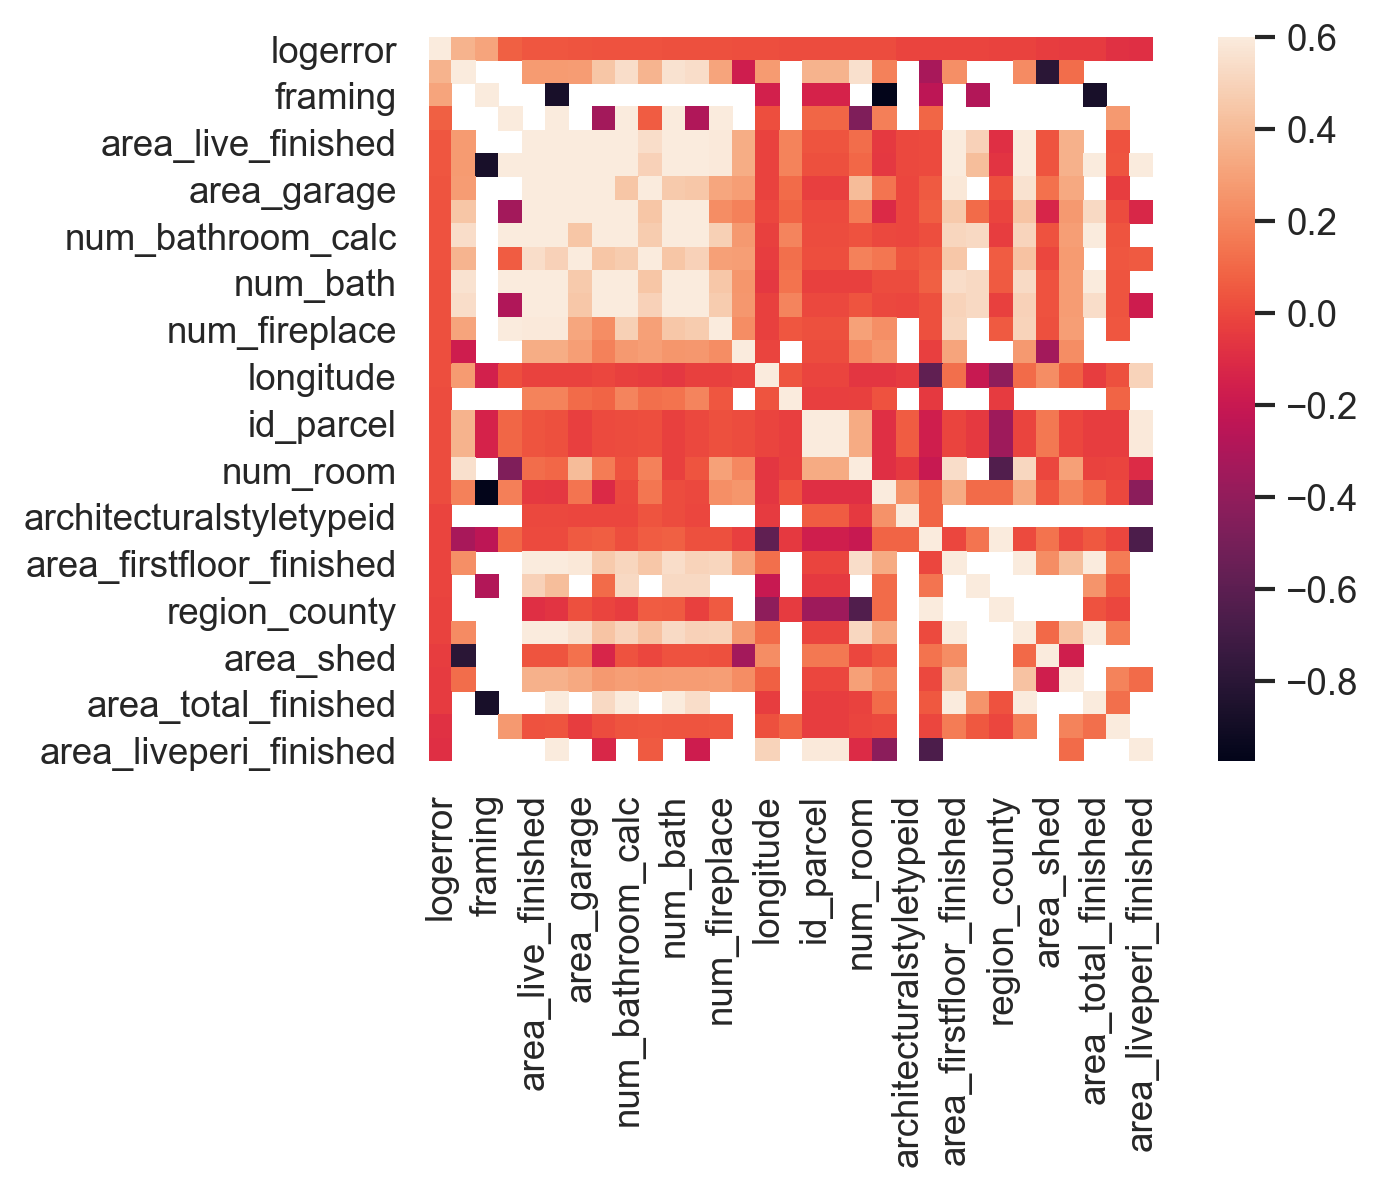

In [173]:
sns.heatmap(properties[attributes_logerror].corr(), vmax=0.6, square=True, annot=False);

In [174]:
logerror_correllation

logerror                    1.000000
basementsqft                0.372067
framing                     0.315372
area_base                   0.072870
area_live_finished          0.045921
area_total_calc             0.040516
area_garage                 0.035015
num_bedroom                 0.031638
num_bathroom_calc           0.029330
num_garage                  0.029002
num_bath                    0.027133
num_bathroom                0.025817
num_fireplace               0.023242
area_pool                   0.021174
longitude                   0.015876
num_75_bath                 0.015540
id_parcel                   0.015407
id_parcel_transaction       0.015407
num_room                    0.014567
area_lot                    0.011012
aircon                      0.009341
tax_building                0.008433
num_story                   0.008204
id_fips                     0.006413
id_zoning_raw               0.006333
build_year                  0.004861
id_zoning                   0.004613
t